In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('/home/gray/Desktop/dataset/CTG.xls', sheet_name=1,skiprows = 1)

In [3]:
dataset

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN


In [4]:
dataset = dataset.dropna(axis=1, how='all')
dataset = dataset.dropna(axis=0, how='any')
dataset = dataset.drop(['b','e','DR','Tendency'], axis=1)

In [5]:
dataset

,AC,FM,UC,DL,DS,DP,LB,AC.1,FM.1,UC.1,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.000000,0.000000,0.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,4.0,0.0,4.0,2.0,0.0,0.0,132.0,0.006380,0.000000,0.006380,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,2.0,0.0,5.0,2.0,0.0,0.0,133.0,0.003322,0.000000,0.008306,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,2.0,0.0,6.0,2.0,0.0,0.0,134.0,0.002561,0.000000,0.007682,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,4.0,0.0,5.0,0.0,0.0,0.0,132.0,0.006515,0.000000,0.008143,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.0,0.0,6.0,0.0,0.0,0.0,140.0,0.000000,0.000000,0.007426,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2122,1.0,0.0,9.0,0.0,0.0,0.0,140.0,0.000775,0.000000,0.006971,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2123,1.0,0.0,7.0,0.0,0.0,0.0,140.0,0.000980,0.000000,0.006863,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2124,1.0,0.0,9.0,0.0,0.0,0.0,140.0,0.000679,0.000000,0.006110,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0


In [6]:
X = dataset.iloc[:, :37]
X.shape

(2126, 37)

In [7]:
Y = dataset.iloc[:, [37]]
Y.shape

(2126, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [9]:
print('{}  {}'.format(X_train.shape, Y_train.shape))

(1700, 37)  (1700, 1)


In [10]:
df = dataset.iloc[:, :]
corrmat = df.corr()

<function matplotlib.pyplot.show(*args, **kw)>

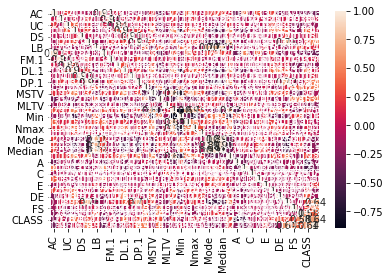

In [11]:
sn.heatmap(corrmat, annot=True)
plt.show

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, Y_test)
print(score)
print(predictions)

0.9530516431924883
[1. 1. 3. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 3. 2. 1. 2. 1. 3. 1. 1. 1. 2. 1. 2. 1. 3. 1. 1. 1.
 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
cnf_matrix

array([[331,   3,   2],
       [  9,  50,   2],
       [  0,   4,  25]])

In [14]:
def normalise(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis=0)
    X = (X-mean)/std
    print(mean)
    print(std)
    return X

def biasing(x):
    n = x.shape[0]
    arr = np.ones((n, 1))
    x = np.hstack((arr, x))
    return x

In [15]:
X_train = normalise(X_train)
X_test = normalise(X_test)

AC            2.643529
FM            7.330588
UC            3.651176
DL            1.557647
DS            0.002941
DP            0.134118
LB          133.141176
AC.1          0.003106
FM.1          0.009580
UC.1          0.004377
DL.1          0.001880
DS.1          0.000003
DP.1          0.000168
ASTV         46.635294
MSTV          1.337059
ALTV          9.882353
MLTV          8.314294
Width        70.833529
Min          93.124706
Max         163.958235
Nmax          4.070588
Nzeros        0.326471
Mode        137.240588
Mean        134.401176
Median      137.863529
Variance     19.232353
A            -0.641176
B            -0.462353
C            -0.944706
D            -0.917647
E            -0.930588
AD           -0.697647
DE           -0.757647
LD           -0.892941
FS           -0.934118
SUSP         -0.821176
CLASS         4.512353
dtype: float64
AC           3.487961
FM          38.377952
UC           2.851228
DL           2.495802
DS           0.054153
DP           0.474912
LB

In [16]:
# def sigmoid_func(theta, x):
# #     print(x.shape)
# #     print(theta.shape)
#     temp = x@theta
#     return 1/(1 + np.exp(-temp))

In [17]:
# def likelihood(x, y, w):
#     sig = np.log(sigmoid_func(w, x))
#     #print(sig)
#     part1 = np.dot(y.T,sig)
#     part2 = ((1-y).T)@np.log(1 - sigmoid_func(w, x))
#     return part1+part2

In [18]:
# def gradient_ascent(x, y, w, alpha, itr):
#     J = []
#     initial = np.sum(likelihood(x, y, w))
#     J.append(initial)
#     N = x.shape[0]
#     for i in range(0, itr):
#         d = (y - sigmoid_func(w, x))
#         w = w + (alpha*np.dot(x.T,d))/N
#         #print(w.shape)
#         cost = likelihood(x, y, w)
#         #J.append(np.sum(cost))
#     return J, w


In [19]:
# theta = np.zeros((X_train.shape[1]+1, 1))
# theta.shape

In [20]:
# X_train1 = biasing(X_train)
# J, w1 = gradient_ascent(X_train1, Y_train, theta, 0.009, 1000)

In [21]:
# Y_train.shape
# sig = np.log(sigmoid_func(theta, X_train1))
# print(sig.shape)
# print(Y_train.shape)
# print(Y_train.T@sig)

In [22]:
# Y_train.shape
# print(w1)

In [23]:
# print(w1)

In [24]:
# X_test = normalise(X_test)
# X_test1 = biasing(X_test)
# Y_pred = sigmoid_func(w1, X_test1)
# Y_pred
# np.

In [25]:
# res = []
# for i in range(Y_pred.shape[0]):
#     if(Y_pred[i]<=0.8):
#         res.append(1)
#     elif(Y_pred[i]<1):
#         res.append(2)
#     else:
#         res.append(3)
# res

In [26]:
# true = 0
# false = 0
# x = np.array(Y_test['NSP'])
# print(x)
# for i in range (0,x.shape[0]):
#     if(x[i] == res[i]):
#         true += 1
#     else:
#         false += 1
# print(true/(true+false))    
